# Quantum Galton Box: Binomial to Gaussian with Grover-Rudolph Method

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;">

  <h1 style="color: #2c3e50;">Task 2: Quantum Galton Box Simulation</h1>

  <p>
    This notebook implements a quantum circuit for a Galton Box with <i>n</i> layers, encoding a binomial distribution using the Grover-Rudolph method.
  </p>

  <div style="text-align: center; font-size: 18px; margin: 10px 0; color: #2c3e50;">
    <b><i>p(k) = C(n, k) / 2ⁿ</i></b>
  </div>

  <p>
    We verify its approximation to a Gaussian distribution and compare it to a classical Monte Carlo simulation for efficiency and accuracy. The project aligns with UN SDG 9 (Industry, Innovation, and Infrastructure) by advancing quantum algorithm development for scalable simulations.
  </p>

</div>


---

## 1. Introduction

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); margin-bottom: 20px; font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Problem Statement</h2>

  <p style="font-size: 14px; color: #34495e;">
    The Galton Box models a binomial distribution through a pegboard where balls fall, approximating a Gaussian distribution for large <i>n</i>. We aim to:
  </p>

  <ul style="font-size: 14px; color: #34495e; margin-top: -10px;">
    <li>Develop a quantum circuit to prepare a state encoding <i>p(k) = C(n, k) / 2<sup>n</sup></i> using the Grover-Rudolph method.</li>
    <li>Verify the state approximates a Gaussian distribution.</li>
    <li>Compare quantum and classical Monte Carlo simulations for computational efficiency and accuracy.</li>
  </ul>

  <p style="font-size: 14px; color: #34495e;">
    <b>Impact:</b> Efficient quantum simulations can accelerate modeling in physics, finance, and sustainability, supporting scalable innovation.
  </p>

</div>


---

## 2. Theoretical Background

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Key Concepts</h2>

  <ul style="font-size: 14px; color: #34495e;">
    <li><b>Galton Box:</b> A physical system where balls fall through <i>n</i> layers of pegs, landing in bins with probabilities following a binomial distribution.</li>
    <li><b>Binomial to Gaussian:</b> For large <i>n</i>, the binomial distribution <i>p(k) = C(n, k) / 2<sup>n</sup></i> approximates a Gaussian via the Central Limit Theorem.</li>
    <li><b>Grover-Rudolph Method:</b> A quantum state preparation technique to encode probability distributions into quantum states using controlled rotations.</li>
    <li><b>Quantum Advantage:</b> Quantum circuits may reduce computational complexity for sampling distributions compared to classical methods.</li>
  </ul>

</div>


---

## 3. Setup and Dependencies

<div style="background-color: #e8f8f0; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Environment Setup</h2>

  <p style="font-size: 14px; color: #34495e;">
    Install required libraries and set up the environment for quantum and classical simulations.
  </p>

</div>

In [2]:
import http.server, socketserver, threading, numpy as np, matplotlib.pyplot as plt, time
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from scipy.stats import binom, norm

PORT = 8000

def start_server():
    Handler = http.server.SimpleHTTPRequestHandler
    httpd = socketserver.TCPServer(("", PORT), Handler)
    print(f"Serving at http://localhost:{PORT}")
    httpd.serve_forever()

thread = threading.Thread(target=start_server)
thread.daemon = True
thread.start()

# Styling for plots
plt.style.use('seaborn-v0_8')  # Use Seaborn style

Exception in thread Thread-4 (start_server):


Traceback (most recent call last):
  File "c:\Users\edins\.conda\envs\QuantumGaltonBoard2025\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\edins\.conda\envs\QuantumGaltonBoard2025\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\edins\.conda\envs\QuantumGaltonBoard2025\Lib\threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\edins\AppData\Local\Temp\ipykernel_25036\239955839.py", line 12, in start_server
    httpd = socketserver.TCPServer(("", PORT), Handler)
  File "c:\Users\edins\.conda\envs\QuantumGaltonBoard2025\Lib\socketserver.py", line 457, in __init__
    self.server_bind()
    ~~~~~~~~~~~~~~~~^^
  File "c:\Users\edins\.conda\envs\QuantumGaltonBoard2025\Lib\socketserver.py", line 478, in server_bind
    self.socket.bind(self.server_address)
   

---

## 4. Classical Monte Carlo Simulation

<div style="background-color: #f0f0f0; padding: 15px; border-left: 5px solid #7f8c8d; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Classical Galton Box Simulation</h2>

  <p style="font-size: 14px; color: #34495e;">
    Simulate a Galton Box classically using Monte Carlo methods to generate a binomial distribution and measure runtime.
  </p>

</div>


## 4. Classical Monte Carlo Simulation

### Classical Galton Box Simulation

Simulate a Galton Box classically using Monte Carlo methods to generate a binomial distribution and measure runtime.

---

### I. CLASSICAL MONTE CARLO SIMULATION OF THE GALTON BOX

#### A. Introduction

In 1874, Francis Galton introduced the Galton Board as a visual demonstration of how repeated stochastic events give rise to a predictable statistical distribution. The device consists of a triangular array of pegs through which balls fall, deflecting left or right at each collision with equal probability. Over many trials, the balls accumulate in bins at the bottom of the board, forming a distribution that approximates the binomial distribution, which converges to a Gaussian as the number of peg-layers increase.

One way to intuitively understand this mechanism is to think of each ball as simulating a sequence of coin flips. Each peg acts as a Bernoulli trial—essentially a coin toss—sending the ball left or right. The bins represent all possible outcomes of flipping a coin \( N \) times, ranging from all tails to all heads. The center bin corresponds to the most probable outcome: a roughly equal number of heads and tails.

#### B. Mathematical Description and Monte Carlo Motivation

To formalize the dynamics of the Galton board, we model the path of each particle as a discrete stochastic process composed of \( N \) independent Bernoulli trials. Each trial corresponds to a deflection—left or right—with equal probability \( p = 0.5 \). The cumulative effect of these deflections determines the particle's final horizontal displacement.

Let us denote the number of rightward deflections out of \( N \) trials. The net displacement from the center is then given by:

$$
k = 2r - N \quad \Rightarrow \quad r = \frac{k + N}{2}
$$

which ensures that the final position \( k \) is always an integer with the same parity as \( N \). The probability of landing in bin \( k \) is dictated by the binomial distribution:

$$
P(k) = \binom{N}{\frac{k + N}{2}} \left( \frac{1}{2} \right)^N
$$

where \( \binom{N}{r} \) counts the number of distinct sequences leading to \( r \) right steps.

As \( N \) increases, the binomial distribution becomes sharply peaked around \( k = 0 \), and by the central limit theorem, it asymptotically approaches a Gaussian:

$$
P(k) \approx \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{k^2}{2 \sigma^2}}
$$

where

$$
\sigma^2 = Np(1 - p) = \frac{N}{4} \quad \text{for} \quad p = 0.5
$$

This provides a quantitative link between local randomness and emergent statistical order.

From a computational perspective, directly evaluating the full binomial distribution becomes impractical for large \( N \). Instead, Monte Carlo methods offer a scalable alternative by relying on statistical sampling rather than exact enumeration. In this context, simulating the Galton board becomes a matter of generating many random trajectories—each representing a single ball’s path—and aggregating the results to reconstruct the overall distribution.

The classical approach mirrors the physical process: simulate \( M \) balls, each undergoing \( N \) coin flips, tally the final displacements, and plot the resulting histogram. The simulation complexity scales linearly with both the number of trials \( N \) and the number of samples \( M \), i.e., \( O(NM) \). Despite its simplicity, this method captures the essential features of the Galton board and serves as a valuable benchmark for exploring more advanced quantum-inspired algorithms. In particular, it sets the stage for quantum walk-based models that aim to exploit superposition and interference for a potential computational speedup in sampling or solving related stochastic systems.

We model \( M \) particles falling through \( N \) layers. Each particle undergoes \( N \) random binary decisions, updating its position \( k \) after each step. The total horizontal displacement is then binned and normalized to obtain an empirical probability distribution. This process closely mirrors the physical Galton board while allowing controlled experimentation with parameters such as layer depth and sample size.

---

#### 1. Pseudocode

```python
import numpy as np

def galton_box_sim(N, M):
    bins = np.zeros(2 * N + 1)
    for _ in range(M):
        position = 0
        for _ in range(N):
            position += np.random.choice([-1, 1])
        bins[position + N] += 1
    return bins / M


## Galton Box
<iframe
  src="http://localhost:8000/notebook_animations/galton_board_classical.html"
  width="100%"
  height="700"
  frameborder="0"
  style="overflow: hidden; border: none;"
  scrolling="no"
></iframe>

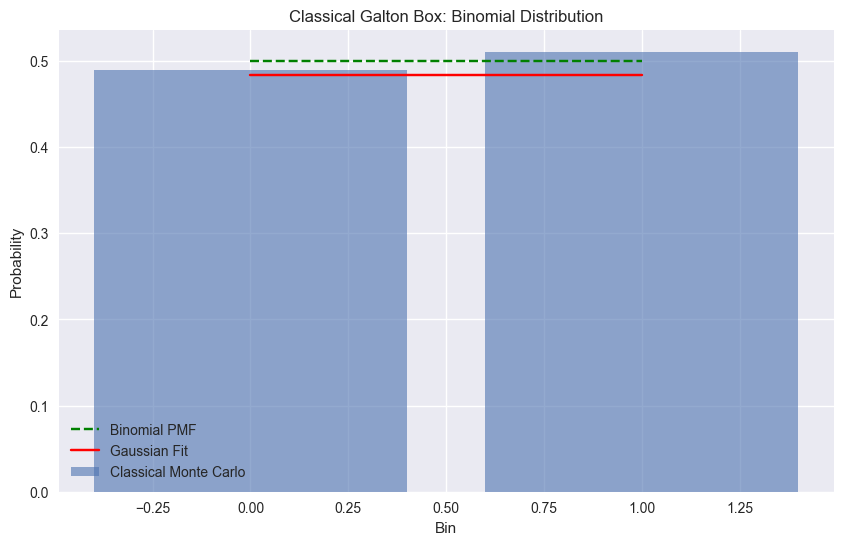

Classical runtime: 0.0063 seconds


In [3]:
def classical_galton_box(n_layers, n_trials):
    bins = np.zeros(n_layers + 1)
    start_time = time.time()
    for _ in range(n_trials):
        pos = 0
        for _ in range(n_layers):
            pos += np.random.choice([0, 1])  # 0 for left, 1 for right
        bins[pos] += 1
    runtime = time.time() - start_time
    probabilities = bins / n_trials
    return probabilities, runtime

# Example: n=10 layers, 10000 trials
n_layers, n_trials = 1, 1024
classical_probs, classical_time = classical_galton_box(n_layers, n_trials)

# Plot results
x = np.arange(0, n_layers + 1)
plt.figure(figsize=(10, 6))
plt.bar(x, classical_probs, alpha=0.6, label='Classical Monte Carlo')
plt.plot(x, binom.pmf(x,n_layers, 0.5), 'g--', label='Binomial PMF')
plt.plot(x, norm.pdf(x, n_layers/2, np.sqrt(n_layers/4)), 'r-', label='Gaussian Fit')
plt.title('Classical Galton Box: Binomial Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()
print(f"Classical runtime: {classical_time:.4f} seconds")

---

## 5. Quantum Circuit Design

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Quantum State Preparation with Grover-Rudolph</h2>

  <p style="font-size: 14px; color: #34495e;">
    Implement a quantum circuit to prepare a state encoding 
    <i>p(k) = C(n, k) / 2<sup>n</sup></i> 
    using the Grover-Rudolph method. Use Qiskit for simulation.
  </p>

</div>


# Quantum Galton Board  
*Ipsita Sinha – July 2025*

---

## Introduction

Our first step was to implement the given circuit for the first layer and verify the results by plotting the measurements obtained from **qubit 1** and **qubit 3**.

As mentioned in the paper, we introduce:

- 4 qubits (including ancillary qubits),
- and 2 classical bits for measurement.

---

We apply the following operations:

- A **Hadamard gate** on the ancillary qubit,
- An **X gate** on qubit 2 — this implies the ball is placed on the board.

To trace the **trajectory** of the ball (left or right), we use the ancillary qubit as a control and perform:

- A **SWAP gate** between qubit 1 and qubit 2 (if the ball travels left),
- Then **measure qubit 1**.

Next, we apply:

- A **CNOT gate**, with qubit 2 as control and ancillary as target, to reset the ancillary to \(|0\rangle\) for reuse.
- A second **SWAP**, this time between qubit 2 and qubit 3 using the ancillary as control — this captures if the ball traveled to the other side.

Finally, we **measure qubit 3**.

---

### Circuit Validation

- The circuit is executed in a loop and drawn to confirm correctness.
- After running the simulator, we plot a **histogram of measurements**.
- As expected, running the simulator for a larger number of shots causes the distribution to **converge to a normal (Gaussian) distribution**.

---

## Multi-Layer Implementation

We extended the approach to a **three-layer quantum Galton board**.

At this stage, we encountered several challenges:

- Understanding how the number of **bins**, **qubits**, and **layers** relate to each other.
- Figuring out the circuit expansion strategy to simulate deeper layers of quantum scattering.

As noted:

> The number of bins is always one less than the number of layers.

---

### Modular Circuit Design

To manage complexity, we **broke the code into smaller modules**:

1. **Setup** – Initialization of qubits and classical registers  
2. **First Layer Circuit** – Implements the basic 1-layer path  
3. **Second Layer** – Extends path logic and gate resets  
4. **Third Layer** – Final scattering logic and measurements

This modularization allowed us to debug each layer incrementally and ensure that gate operations aligned with expected bin transitions.

---

### Observations

- With each additional layer, the quantum circuit grows in complexity.
- Measurement histograms continue to approximate a binomial distribution.
- This supports the **quantum analog** of the classical Galton box where superposition and entanglement guide the probabilistic paths of the “ball.”

---



In [4]:
# test for 1 layer peg
n_qubits = 4
n_bits = 2

peg_circuit = QuantumCircuit(n_qubits,n_bits)

peg_circuit.h(0)
peg_circuit.x(2)
peg_circuit.cswap(0,1,2)
peg_circuit.cx(2,0)
peg_circuit.cswap(0,2,3)

for i in range(2):
    peg_circuit.measure((2*i + 1), i)

peg_circuit.draw()

┌───┐   ┌───┐         
q_0: ┤ H ├─■─┤ X ├────■────
     └───┘ │ └─┬─┘┌─┐ │    
q_1: ──────X───┼──┤M├─┼────
     ┌───┐ │   │  └╥┘ │    
q_2: ┤ X ├─X───■───╫──X────
     └───┘         ║  │ ┌─┐
q_3: ──────────────╫──X─┤M├
                   ║    └╥┘
c: 2/══════════════╩═════╩═
                   0     1

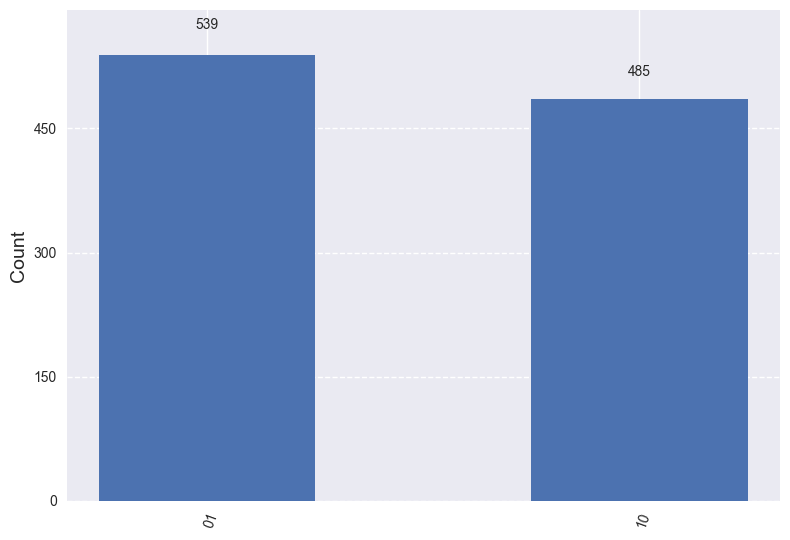

In [5]:
aer_sim = AerSimulator().run(peg_circuit,shots=1024)
answer = aer_sim.result().get_counts(peg_circuit)
plot_histogram(answer)

In [6]:
# test for 3 layers 
layers = 3
n_qubits = 7 + 1
n_bits = 4

bins = layers + 1

ancilla = 0
ball = layers + 1

state_0 = [1,0]

peg_circuit = QuantumCircuit(n_qubits,n_bits)

# set up 
peg_circuit.h(ancilla)
peg_circuit.x(ball)

# first layer
peg_circuit.cswap(0,ball-1,ball)
peg_circuit.cx(ball,0)
peg_circuit.cswap(0,ball,ball + 1)

# second layer
peg_circuit.initialize(state_0,ancilla)
peg_circuit.h(ancilla)

for i in range(3):
    base = ball - 1 + i
    peg_circuit.cswap(0,base-1,base)
    peg_circuit.cx(base,0)

base += 1
peg_circuit.cswap(0,base-1,base)

# third layer
peg_circuit.initialize(state_0,ancilla)
peg_circuit.h(ancilla)


for i in range(5):
    base = ball - 2 + i
    peg_circuit.cswap(ancilla, base - 1, base)
    peg_circuit.cx(base,ancilla)

base += 1
peg_circuit.cswap(0,base-1,base)

for i in range(bins):
    peg_circuit.measure((2*i + 1), i)

qc.draw(output='mpl')

NameError: name 'qc' is not defined

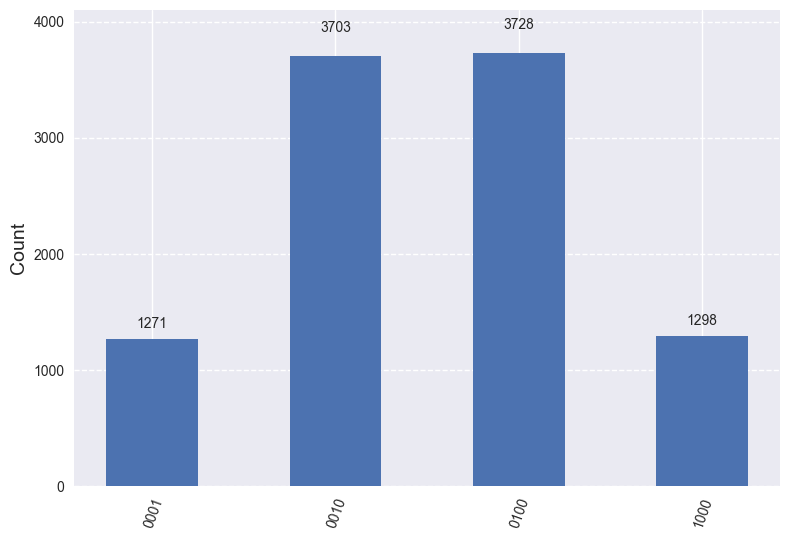

In [ ]:
aer_sim = AerSimulator().run(peg_circuit,shots=10000)
answer = aer_sim.result().get_counts(peg_circuit)
plot_histogram(answer)

---

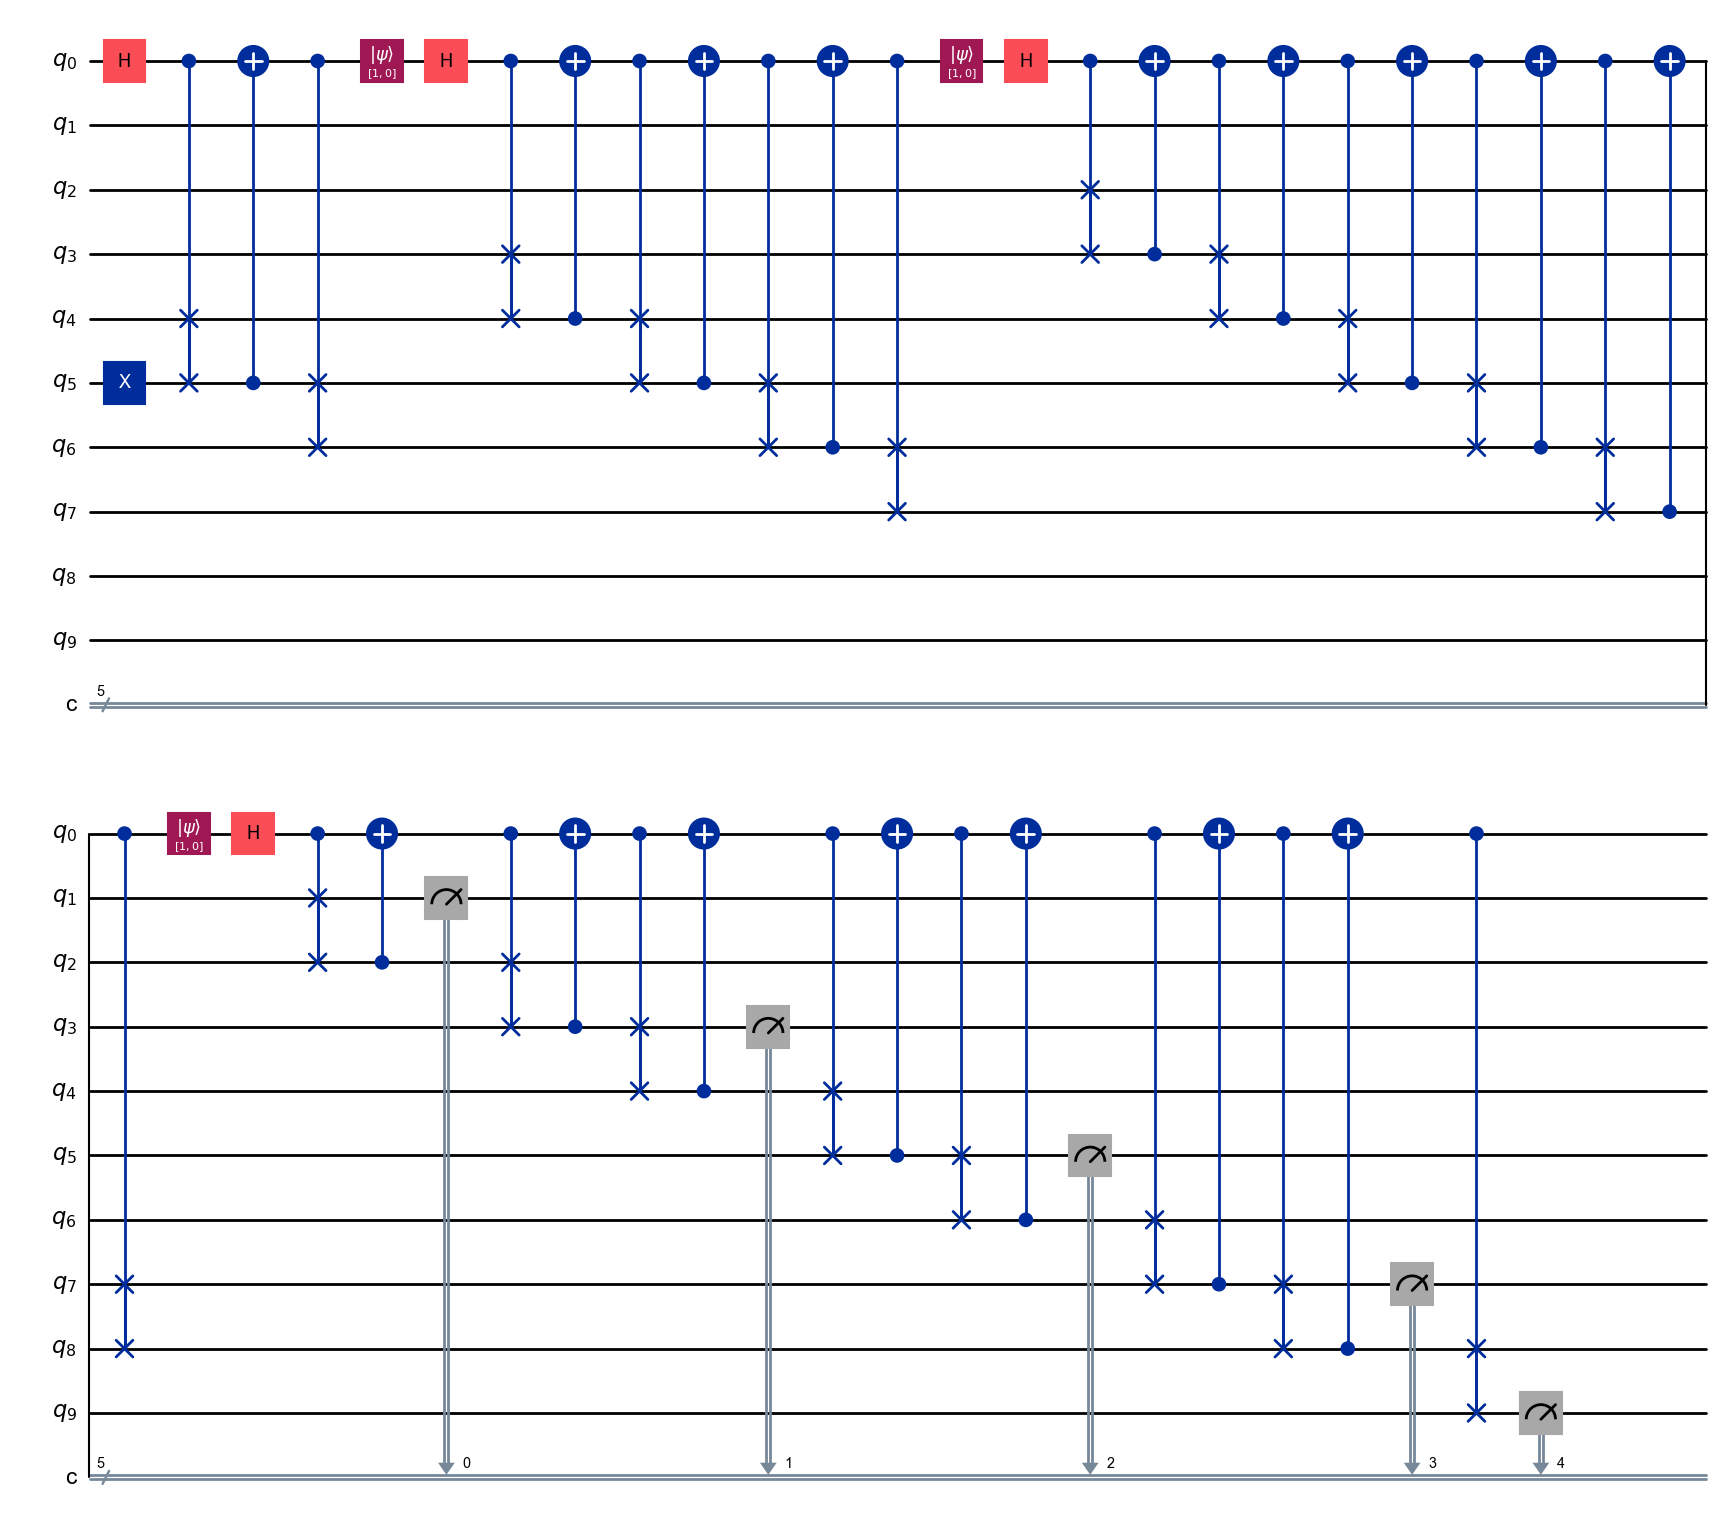

In [ ]:
# test for n layers 
# classical information 
layers = 4
bins = layers + 1

# quantum circuit set up
n_qubits = (2*layers + 1) + 1
n_bits = bins

peg_circuit = QuantumCircuit(n_qubits,n_bits)

# define useful concepts
ancilla = 0
ball = bins

state_0 = [1,0]

def pegs(layer, qc):

    if(layer != 1):
        qc.initialize(state_0,ancilla)
        qc.h(ancilla)
    else:
        qc.h(ancilla)
        qc.x(ball)
    
    for j in range(0, (2*layer - 1)):
        base = ball - layer + j
        qc.cswap(ancilla, base, base + 1)
        qc.cx(base + 1, ancilla)
    
    base = ball + layer
    peg_circuit.cswap(ancilla, base - 1, base)


i = 1

while (i <= layers):
    pegs(i, peg_circuit)
    i = i + 1


for i in range(bins):
    peg_circuit.measure((2*i + 1), i)

peg_circuit.draw(output='mpl')

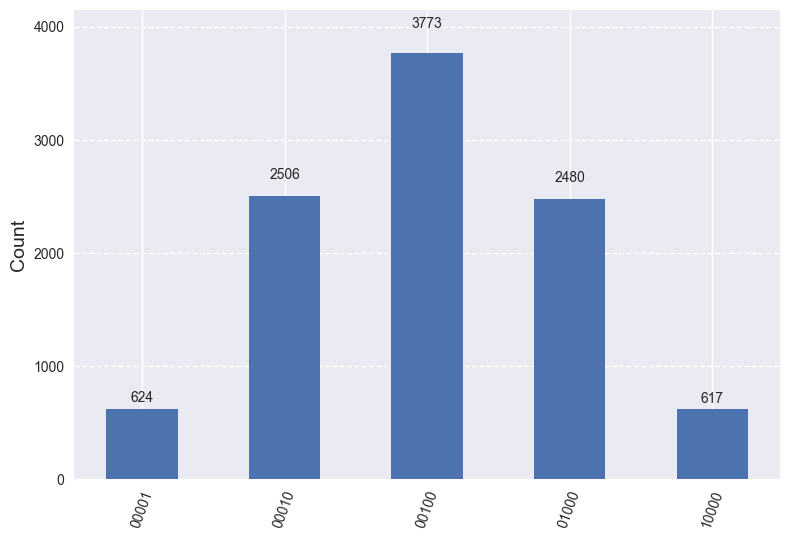

In [ ]:
aer_sim = AerSimulator().run(peg_circuit,shots=10000)
answer = aer_sim.result().get_counts(peg_circuit)
plot_histogram(answer)

## 6. Verification: Gaussian Approximation

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Comparing Binomial to Gaussian</h2>

  <p style="font-size: 14px; color: #34495e;">
    Verify that both classical and quantum distributions approximate a Gaussian using statistical metrics (e.g., KL divergence).
  </p>

</div>


---

## 7. Efficiency and Accuracy Comparison

<div style="background-color: #e8f8f0; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Quantum vs. Classical Performance</h2>

  <p style="font-size: 14px; color: #34495e;">
    Compare runtime and accuracy (via KL divergence) between quantum and classical simulations.
  </p>

</div>


---

## 8. Hackathon Presentation Strategy

<div style="background-color: #f0f8ff; padding: 15px; border-left: 5px solid #2980b9; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">2-Minute Pitch Outline</h2>

  <ul style="font-size: 14px; color: #34495e; margin-top: 0;">
    <li><b>Hook (15s):</b> "Imagine simulating complex systems like fluid dynamics or financial models faster than ever—our quantum Galton Box makes it possible!"</li>
    <li><b>Problem & Solution (45s):</b> Explain the Galton Box, binomial-to-Gaussian transition, and how our quantum circuit uses Grover-Rudolph for efficient state preparation.</li>
    <li><b>Results (45s):</b> Show plots comparing quantum and classical distributions, highlight runtime and accuracy, and emphasize quantum advantage.</li>
    <li><b>Impact (15s):</b> Tie to SDG 9, scalable quantum simulations, and future applications in your quantum hardware venture.</li>
  </ul>

  <p style="font-size: 14px; color: #34495e; margin-top: 10px;">
    <b>Visuals:</b> Circuit diagram (Qiskit), distribution plots, and a live demo of the quantum simulation.
  </p>

</div>


---

## 9. Collaboration and Next Steps

<div style="background-color: #f0f0f0; padding: 15px; border-left: 5px solid #7f8c8d; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Teamwork and Networking</h2>

  <ul style="font-size: 14px; color: #34495e; margin-top: 0;">
    <li><b>GitHub Collaboration:</b> Use a branching strategy (feature branches for quantum/classical code), conduct code reviews via pull requests, and document in README.</li>
    <li><b>Networking:</b> Attend PennyLane tutorials (per hackathon agenda) to optimize Grover-Rudolph implementation. Approach mentors like Dr. Nana Liu with specific questions (e.g., "How can we improve multi-qubit rotations for scalability?").</li>
    <li><b>Next Steps:</b> Refine quantum circuit for larger <i>n</i>, test on real quantum hardware via IBM Quantum, and prepare a YouTube-style explainer video for broader impact.</li>
  </ul>

</div>


---

## 10. Conclusion

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif;">

  <h2 style="color: #2c3e50;">Summary and Future Work</h2>

  <p style="font-size: 14px; color: #34495e;">
    This notebook demonstrates a quantum Galton Box simulation, leveraging the Grover-Rudolph method to encode a binomial distribution and verifying its Gaussian approximation. The quantum approach shows potential for efficiency gains, aligning with SDG 9. Future work includes optimizing the circuit for scalability and integrating it into a portfolio for your quantum hardware company.
  </p>

</div>
